In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('data/Studentsperformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

checking column unique value

In [12]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
# divide by data type
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['total score']/3
# df.drop(columns=['math score','reading score','writing score'],inplace=True,axis=1)

no.of student that acheived full marks in any subject

In [24]:
math_full=df[df['math score']==100]
writing_full=df[df['writing score']==100]
reading_full=df[df['reading score']==100]

print('no of student full marks in math {}'.format(len(math_full)))
print('no of student full marks in writing {}'.format(len(writing_full)))
print('no of student full marks in reading {}'.format(len(reading_full)))

no of student full marks in math 7
no of student full marks in writing 14
no of student full marks in reading 17


In [26]:
math_full=df[df['math score']<=20]
writing_full=df[df['writing score']<=20]
reading_full=df[df['reading score']<=20]

print('no of student less than 20 marks in math {}'.format(len(math_full)))
print('no of student less than 20 marks in writing {}'.format(len(writing_full)))
print('no of student less than 20 marks in reading {}'.format(len(reading_full)))

no of student less than 20 marks in math 4
no of student less than 20 marks in writing 3
no of student less than 20 marks in reading 1


visualize data

<Axes: xlabel='average score', ylabel='Count'>

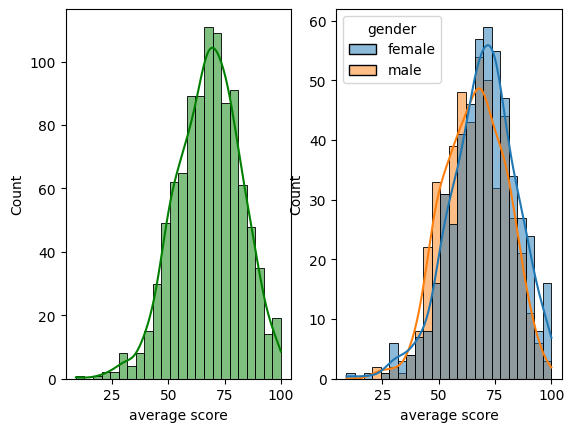

In [28]:
plt.subplot(1,2,1)
sns.histplot(data=df,x='average score',kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x='average score',kde=True,hue='gender')

female studnt much performing well

<Axes: xlabel='average score', ylabel='Count'>

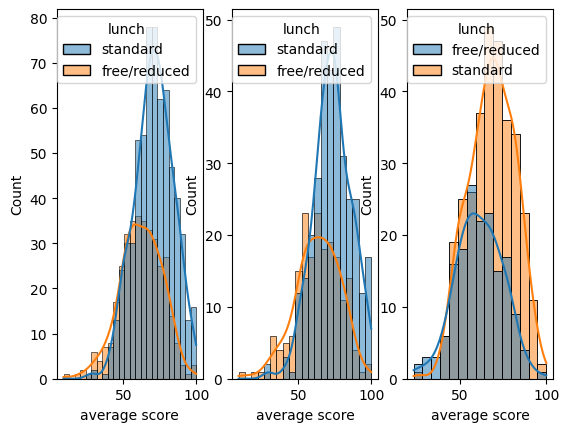

In [30]:
# plt.subplots(1,3)
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')



<Axes: xlabel='average score', ylabel='Count'>

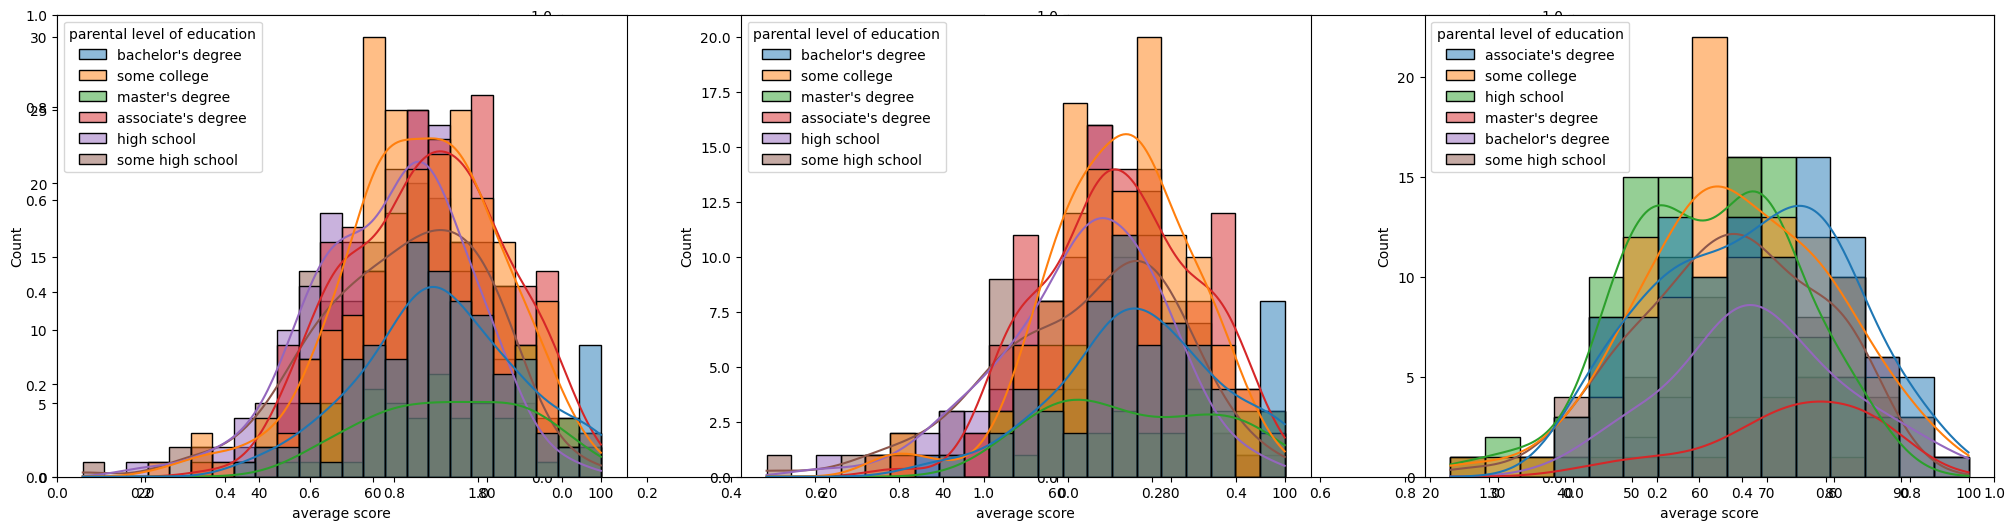

In [33]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')



<Axes: ylabel='writing score'>

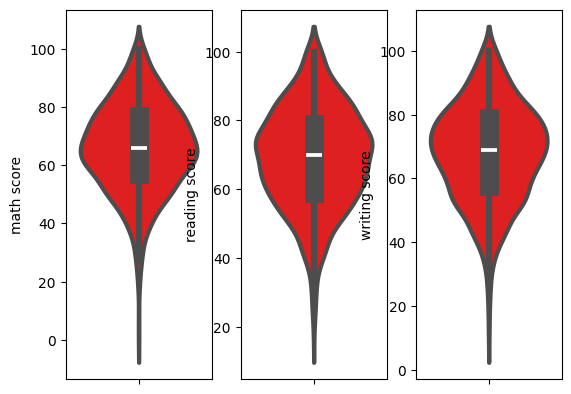

In [38]:
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math score',color='red',linewidth=3)

plt.subplot(1,3,2)
sns.violinplot(data=df,y='reading score',color='red',linewidth=3)

plt.subplot(1,3,3)
sns.violinplot(data=df,y='writing score',color='red',linewidth=3)